# Comparando arquiteturas

### Modelo 1:
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

### Modelo 2:
- Convolution2D filter 3x3 activation relu
- MaxPooling2D filter 3x3 
- Dropout 0.2
- Flatten
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

### Modelo 3:
- Convolution2D filter 5x5 activation relu
- MaxPooling2D filter 4x4
- Dropout 0.2
- Flatten
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

# TODO:  Modelo 4: MobileNet (com freeze em todas as camadas)

# TODO:  Modelo 5: VGG16 (com freeze em todas as camadas)


# TODO: criar modelos MobileNet e VGG16 com algumas camadas descongeladas

In [1]:
# seed para Pyhton 
import random as rn
rn.seed(1254)

# seed para Tensorflow
import tensorflow as tf
tf.set_random_seed(89)

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Using TensorFlow backend.


Samples shape: (2062, 64, 64)
Labels shape: (2062, 10)

Training shape: (1752, 64, 64)
1752 sample, 64 x 64 size grayscale image.



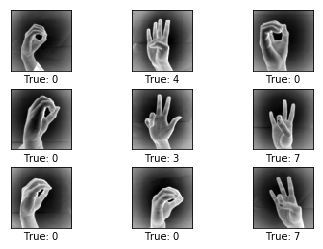

Test shape: (310, 64, 64)
310 sample, 64 x 64 size grayscale image.



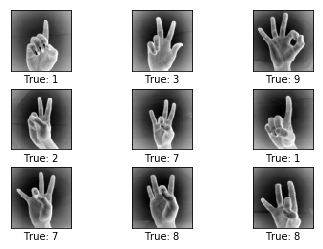

In [2]:
# Configura conjuntos de treinamento e teste 
# X_train, X_test, Y_train, Y_test
%run './functions/SLD-LoadTrainTestSets.ipynb'

In [3]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.models import Sequential, Model, Input
from keras.applications.mobilenet import MobileNet
from keras.layers import Conv2D, GlobalAveragePooling2D, Reshape, MaxPooling2D
from keras.optimizers import Adam

In [4]:
input_shape = (64,64)
adam_lr = 0.0001
nb_epochs = 100
cm_plot_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
validation_split = 0.1
batch_size=10
resultados = []

## Modelo 1 
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

In [5]:
model_1 = Sequential()
model_1.add(Flatten(input_shape=input_shape))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(10, activation='softmax'))
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               524416    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 525,706
Trainable params: 525,706
Non-trainable params: 0
_________________________________________________________________


Train on 1576 samples, validate on 176 samples
Epoch 1/100
1576/1576 [==============================] - 1s 781us/step - loss: 2.3055 - acc: 0.1447 - val_loss: 2.1635 - val_acc: 0.2216
Epoch 2/100
1576/1576 [==============================] - 1s 693us/step - loss: 2.1532 - acc: 0.2145 - val_loss: 2.1528 - val_acc: 0.1932
Epoch 3/100
1576/1576 [==============================] - 1s 704us/step - loss: 1.9965 - acc: 0.3426 - val_loss: 1.9296 - val_acc: 0.3580
Epoch 4/100
1576/1576 [==============================] - 1s 682us/step - loss: 1.8761 - acc: 0.3864 - val_loss: 1.8910 - val_acc: 0.3409
Epoch 5/100
1576/1576 [==============================] - 1s 675us/step - loss: 1.7945 - acc: 0.4124 - val_loss: 1.7800 - val_acc: 0.3693
Epoch 6/100
1576/1576 [==============================] - 1s 631us/step - loss: 1.7223 - acc: 0.4657 - val_loss: 1.7463 - val_acc: 0.3636
Epoch 7/100
1576/1576 [==============================] - 1s 723us/step - loss: 1.6327 - acc: 0.5025 - val_loss: 1.6519 - val_acc: 0

1576/1576 [==============================] - 1s 685us/step - loss: 0.5826 - acc: 0.8306 - val_loss: 0.8381 - val_acc: 0.7670
Epoch 61/100
1576/1576 [==============================] - 1s 635us/step - loss: 0.5750 - acc: 0.8242 - val_loss: 0.8374 - val_acc: 0.7557
Epoch 62/100
1576/1576 [==============================] - 1s 636us/step - loss: 0.5612 - acc: 0.8426 - val_loss: 0.8374 - val_acc: 0.7443
Epoch 63/100
1576/1576 [==============================] - 1s 631us/step - loss: 0.5588 - acc: 0.8338 - val_loss: 0.9688 - val_acc: 0.7102
Epoch 64/100
1576/1576 [==============================] - 1s 621us/step - loss: 0.5629 - acc: 0.8363 - val_loss: 0.8282 - val_acc: 0.7443
Epoch 65/100
1576/1576 [==============================] - 1s 640us/step - loss: 0.5554 - acc: 0.8395 - val_loss: 0.8512 - val_acc: 0.7443
Epoch 66/100
1576/1576 [==============================] - 1s 648us/step - loss: 0.5437 - acc: 0.8464 - val_loss: 0.8753 - val_acc: 0.7614
Epoch 67/100
1576/1576 [=======================

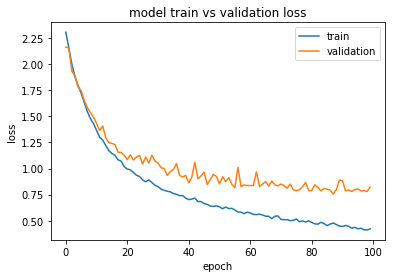

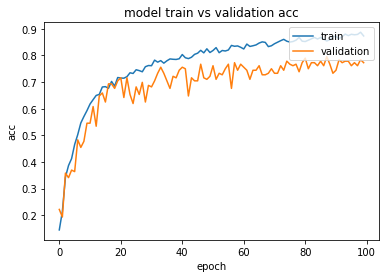

Acertos: 227 / 310
Confusion matrix, without normalization
[[27  2  0  0  2  0  0  0  1  0]
 [ 1 15  1  1  0  1  1  1  3  0]
 [ 0  0 31  0  0  0  1  2  0  0]
 [ 0  1  0 29  0  0  0  0  0  0]
 [ 1  0  1  0 12  2  6  6  1  1]
 [ 0  0  0  5  2 28  0  0  0  0]
 [ 0  0  2  0  1  0 21  4  0  0]
 [ 1  2  6  1  0  0  2 28  2  0]
 [ 0  3  3  0  2  0  1  5 12  2]
 [ 0  0  0  3  0  0  0  0  0 24]]
CPU times: user 3min 3s, sys: 1min 5s, total: 4min 8s
Wall time: 1min 47s


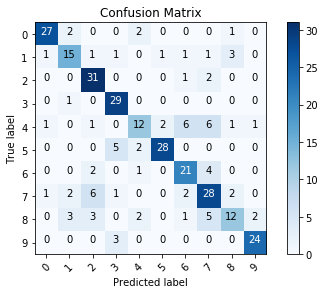

In [6]:
%%time
acertos, pred_1 = execute_model(model_1, X_train, Y_train, X_test, Y_test,
                                validation_split, batch_size, cm_plot_labels, 
                                adam_lr, nb_epochs)
resultados.append({'modelo': 'model_1', 'acertos': acertos})

## Modelo 2
- Convolution2D filter 3x3 activation relu
- MaxPooling2D filter 3x3 
- Dropout 0.2
- Flatten
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

In [7]:
y = x = Input(shape=(64,64,1))
y = Conv2D(3, kernel_size=(3, 3), activation='relu')(y)
y = MaxPooling2D(pool_size=(3, 3))(y)
y = Dropout(0.2)(y)
y = Flatten()(y)
y = Dense(128, activation='relu')(y)
y = Dense(10, activation='softmax')(y)
model_2 = Model(inputs=x, outputs=y)
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 3)         30        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 3)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 20, 3)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               153728    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total para

In [8]:
expand_train_X = np.expand_dims(X_train, axis=-1)
expand_test_X = np.expand_dims(X_test, axis=-1)

Train on 1576 samples, validate on 176 samples
Epoch 1/100
1576/1576 [==============================] - 2s 1ms/step - loss: 2.2782 - acc: 0.1586 - val_loss: 2.2301 - val_acc: 0.2614
Epoch 2/100
1576/1576 [==============================] - 2s 1ms/step - loss: 2.1917 - acc: 0.3325 - val_loss: 2.1358 - val_acc: 0.4205
Epoch 3/100
1576/1576 [==============================] - 2s 1ms/step - loss: 2.0853 - acc: 0.4594 - val_loss: 2.0261 - val_acc: 0.4659
Epoch 4/100
1576/1576 [==============================] - 2s 1ms/step - loss: 1.9648 - acc: 0.5146 - val_loss: 1.8977 - val_acc: 0.4886
Epoch 5/100
1576/1576 [==============================] - 2s 1ms/step - loss: 1.8273 - acc: 0.5539 - val_loss: 1.7626 - val_acc: 0.5398
Epoch 6/100
1576/1576 [==============================] - 2s 2ms/step - loss: 1.6334 - acc: 0.5971 - val_loss: 1.4947 - val_acc: 0.6364
Epoch 7/100
1576/1576 [==============================] - 2s 2ms/step - loss: 1.3663 - acc: 0.6694 - val_loss: 1.3086 - val_acc: 0.6591
Epoch 8/

Epoch 61/100
1576/1576 [==============================] - 3s 2ms/step - loss: 0.2314 - acc: 0.9454 - val_loss: 0.4469 - val_acc: 0.8352
Epoch 62/100
1576/1576 [==============================] - 3s 2ms/step - loss: 0.2308 - acc: 0.9511 - val_loss: 0.4659 - val_acc: 0.8295
Epoch 63/100
1576/1576 [==============================] - 3s 2ms/step - loss: 0.2299 - acc: 0.9410 - val_loss: 0.4479 - val_acc: 0.8352
Epoch 64/100
1576/1576 [==============================] - 3s 2ms/step - loss: 0.2245 - acc: 0.9423 - val_loss: 0.4430 - val_acc: 0.8295
Epoch 65/100
1576/1576 [==============================] - 3s 2ms/step - loss: 0.2150 - acc: 0.9511 - val_loss: 0.4397 - val_acc: 0.8409
Epoch 66/100
1576/1576 [==============================] - 3s 2ms/step - loss: 0.2168 - acc: 0.9543 - val_loss: 0.4518 - val_acc: 0.8295
Epoch 67/100
1576/1576 [==============================] - 3s 2ms/step - loss: 0.2125 - acc: 0.9499 - val_loss: 0.4509 - val_acc: 0.8352
Epoch 68/100
1576/1576 [========================

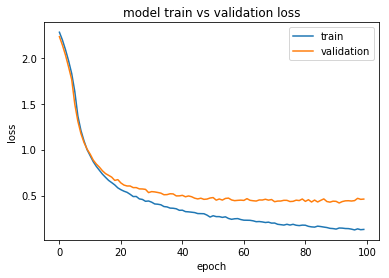

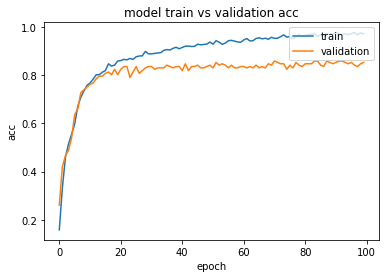

Acertos: 270 / 310
Confusion matrix, without normalization
[[31  1  0  0  0  0  0  0  0  0]
 [ 1 21  0  0  0  0  0  2  0  0]
 [ 0  0 31  0  0  0  0  3  0  0]
 [ 0  1  0 29  0  0  0  0  0  0]
 [ 1  0  0  0 20  0  4  3  1  1]
 [ 0  0  0  0  1 34  0  0  0  0]
 [ 0  0  2  0  3  0 21  2  0  0]
 [ 1  0  1  0  0  0  1 35  4  0]
 [ 0  0  0  0  0  0  0  4 22  2]
 [ 0  0  0  1  0  0  0  0  0 26]]
CPU times: user 7min 38s, sys: 1min 11s, total: 8min 50s
Wall time: 5min 3s


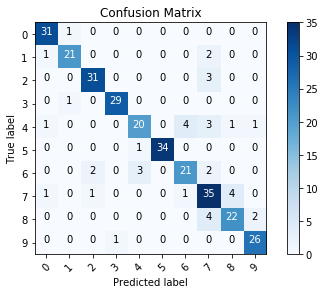

In [9]:
%%time
acertos, pred_2 = execute_model(model_2, expand_train_X, Y_train, expand_test_X, Y_test, 
                                validation_split, batch_size, cm_plot_labels, 
                                adam_lr, nb_epochs)
resultados.append({'modelo': 'model_2', 'acertos': acertos})

## Modelo 3 
- Convolution2D filter 5x5 activation relu
- MaxPooling2D filter 4x4
- Dropout 0.2
- Flatten
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

In [10]:
y = x = Input(shape=(64,64,1))
y = Conv2D(3, kernel_size=(5, 5), activation='relu')(y)
y = MaxPooling2D(pool_size=(4, 4))(y)
y = Dropout(0.2)(y)
y = Flatten()(y)
y = Dense(128, activation='relu')(y)
y = Dense(10, activation='softmax')(y)
model_3 = Model(inputs=x, outputs=y)
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 3)         78        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 3)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 3)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 675)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               86528     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total para

Train on 1576 samples, validate on 176 samples
Epoch 1/100
1576/1576 [==============================] - 6s 4ms/step - loss: 2.3128 - acc: 0.1168 - val_loss: 2.2359 - val_acc: 0.2330
Epoch 2/100
1576/1576 [==============================] - 5s 3ms/step - loss: 2.2051 - acc: 0.2430 - val_loss: 2.1452 - val_acc: 0.4205
Epoch 3/100
1576/1576 [==============================] - 5s 3ms/step - loss: 2.0913 - acc: 0.3661 - val_loss: 2.0160 - val_acc: 0.4943
Epoch 4/100
1576/1576 [==============================] - 5s 3ms/step - loss: 1.9668 - acc: 0.4524 - val_loss: 1.8842 - val_acc: 0.5284
Epoch 5/100
1576/1576 [==============================] - 5s 3ms/step - loss: 1.8300 - acc: 0.5247 - val_loss: 1.7398 - val_acc: 0.5852
Epoch 6/100
1576/1576 [==============================] - 5s 3ms/step - loss: 1.6873 - acc: 0.5673 - val_loss: 1.6209 - val_acc: 0.6023
Epoch 7/100
1576/1576 [==============================] - 5s 3ms/step - loss: 1.5724 - acc: 0.6009 - val_loss: 1.4890 - val_acc: 0.6420
Epoch 8/

Epoch 61/100
1576/1576 [==============================] - 5s 3ms/step - loss: 0.3698 - acc: 0.8890 - val_loss: 0.4804 - val_acc: 0.8636
Epoch 62/100
1576/1576 [==============================] - 5s 3ms/step - loss: 0.3632 - acc: 0.8997 - val_loss: 0.4861 - val_acc: 0.8409
Epoch 63/100
1576/1576 [==============================] - 5s 3ms/step - loss: 0.3576 - acc: 0.8921 - val_loss: 0.4797 - val_acc: 0.8580
Epoch 64/100
1576/1576 [==============================] - 5s 3ms/step - loss: 0.3493 - acc: 0.9023 - val_loss: 0.4853 - val_acc: 0.8295
Epoch 65/100
1576/1576 [==============================] - 5s 3ms/step - loss: 0.3527 - acc: 0.8972 - val_loss: 0.4873 - val_acc: 0.8523
Epoch 66/100
1576/1576 [==============================] - 5s 3ms/step - loss: 0.3403 - acc: 0.9061 - val_loss: 0.4736 - val_acc: 0.8636
Epoch 67/100
1576/1576 [==============================] - 5s 3ms/step - loss: 0.3471 - acc: 0.9016 - val_loss: 0.4793 - val_acc: 0.8352
Epoch 68/100
1576/1576 [========================

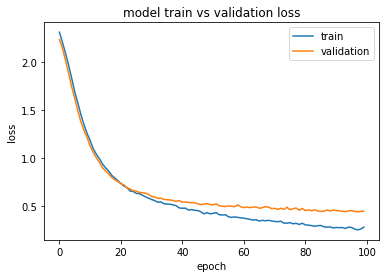

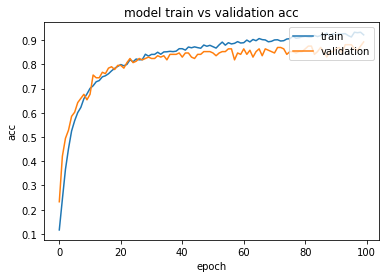

Acertos: 271 / 310
Confusion matrix, without normalization
[[31  1  0  0  0  0  0  0  0  0]
 [ 1 21  1  0  0  0  0  0  1  0]
 [ 0  0 33  0  0  0  0  1  0  0]
 [ 0  0  1 29  0  0  0  0  0  0]
 [ 1  0  0  0 24  0  2  1  1  1]
 [ 0  0  0  0  2 33  0  0  0  0]
 [ 0  0  2  0  3  0 21  2  0  0]
 [ 0  0  1  0  2  0  0 35  4  0]
 [ 0  0  0  0  1  0  0  5 20  2]
 [ 0  0  0  1  1  0  0  0  1 24]]
CPU times: user 13min 23s, sys: 59.5 s, total: 14min 22s
Wall time: 8min 30s


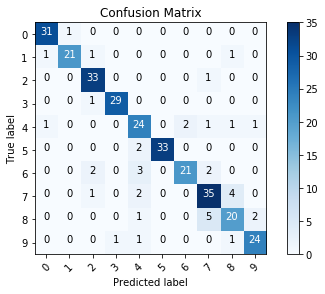

In [11]:
%%time
acertos, pred_3 = execute_model(model_3, expand_train_X, Y_train, expand_test_X, Y_test,
                                validation_split, batch_size, cm_plot_labels, 
                                adam_lr, nb_epochs)
resultados.append({'modelo': 'model_3', 'acertos': acertos})

## Modelo 4 - MobileNet (com freeze em todas as camadas)

In [ ]:
Y_train.shape

## Modelo 5 - VGG16 (com freeze em todas as camadas)